In [44]:
import csv
 
results = []
with open('csv_data/L1_start_pos.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        results.append(row)

In [45]:
theta_cur = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in range(len(results)):
    if results[i]['/HL_STATE/cur_angle.0'] != '':
        for k in range(12):
            theta_cur[k].append(results[i]['/HL_STATE/cur_angle.{0}'.format(k)])

In [46]:
from math import *
print(degrees(float(theta_cur[0][0])), degrees(float(theta_cur[1][0])), degrees(float(theta_cur[2][0])))
print(degrees(float(theta_cur[3][0])), degrees(float(theta_cur[4][0])), degrees(float(theta_cur[5][0])))
print(degrees(float(theta_cur[6][0])), degrees(float(theta_cur[7][0])), degrees(float(theta_cur[8][0])))
print(degrees(float(theta_cur[9][0])), degrees(float(theta_cur[10][0])), degrees(float(theta_cur[11][0])))



14.428853450559036 -141.18195734039102 119.58517268962734
-14.536741403382168 140.3864627376314 -118.97955630017407
-14.49829593532889 39.136970816221634 120.0040621336475
14.451026917230598 -40.06315709205061 -121.06300273060826


In [47]:
from locomotion_control_level.fkine import FKine

fk = FKine()

angle = [float(theta_cur[0][0]), float(theta_cur[1][0]), float(theta_cur[2][0])]
ef_pos = fk.fkine_R1(angle)
print("Leg 1: {0}".format(ef_pos))

angle = [float(theta_cur[3][0]), float(theta_cur[4][0]), float(theta_cur[5][0])]
ef_pos = fk.fkine_L1(angle)
print("Leg 2: {0}".format(ef_pos))

angle = [float(theta_cur[6][0]), float(theta_cur[7][0]), float(theta_cur[8][0])]
ef_pos = fk.fkine_R2(angle)
print("Leg 3: {0}".format(ef_pos))

angle = [float(theta_cur[9][0]), float(theta_cur[10][0]), float(theta_cur[11][0])]
ef_pos = fk.fkine_L2(angle)
print("Leg 4: {0}".format(ef_pos))

Leg 1: {'x': 0.26352753585368693, 'y': -0.13292517125089984, 'z': -0.20802091289181585}
Leg 2: {'x': 0.26551482626993383, 'y': 0.13212443863785714, 'z': -0.20967287615843552}
Leg 3: {'x': -0.2489432340331616, 'y': -0.13298395612366837, 'z': -0.20686670357309445}
Leg 4: {'x': -0.24478631507612403, 'y': 0.13396020877641213, 'z': -0.20370759721399023}


Trajectory during walking

In [48]:
results = []
with open('csv_data/robot_walk_air.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        results.append(row)

In [49]:
theta_cur = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in range(len(results)):
    if results[i]['/HL_STATE/cur_angle.0'] != '':
        for k in range(12):
            theta_cur[k].append(results[i]['/HL_STATE/cur_angle.{0}'.format(k)])

In [61]:
theta_cur[1][0]

'-2.396113'

In [110]:
ef_pos = []
ef_pos_R1 = [[], [], []]
ef_pos_R2 = [[], [], []]
ef_pos_L1 = [[], [], []]
ef_pos_L2 = [[], [], []]
t = []
for i in range(len(theta_cur[0])):
    angle = [float(theta_cur[0][i]), float(theta_cur[1][i]), float(theta_cur[2][i]),
             float(theta_cur[3][i]), float(theta_cur[4][i]), float(theta_cur[5][i]),
             float(theta_cur[6][i]), float(theta_cur[7][i]), float(theta_cur[8][i]),
             float(theta_cur[9][i]), float(theta_cur[10][i]), float(theta_cur[11][i])
            ]
    ef_pos = fk.calculate(angle)
    
    ef_pos_R1[0].append(ef_pos[1]["x"])
    ef_pos_R1[1].append(ef_pos[1]["y"])
    ef_pos_R1[2].append(ef_pos[1]["z"])
    ef_pos_R2[0].append(ef_pos[3]["x"])
    ef_pos_R2[1].append(ef_pos[3]["y"])
    ef_pos_R2[2].append(ef_pos[3]["z"])
    
    ef_pos_L1[0].append(ef_pos[2]["x"])
    ef_pos_L1[1].append(ef_pos[2]["y"])
    ef_pos_L1[2].append(ef_pos[2]["z"])
    ef_pos_L2[0].append(ef_pos[4]["x"])
    ef_pos_L2[1].append(ef_pos[4]["y"])
    ef_pos_L2[2].append(ef_pos[4]["z"])

    t.append(i)

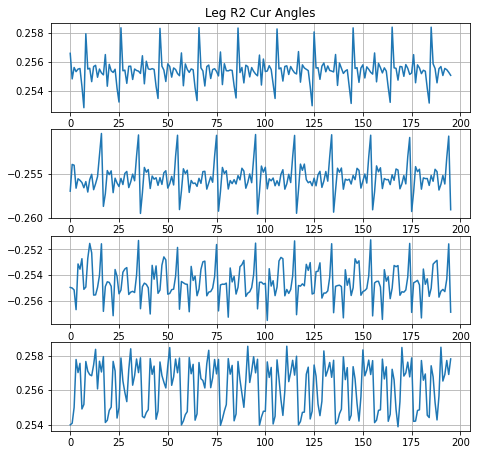

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

lst = [[float(x) for x in (theta_cur[1-1])],
        [float(x) for x in (theta_cur[4-1])],
        [float(x) for x in (theta_cur[7-1])],
        [float(x) for x in (theta_cur[10-1])],]

fig = plt.figure(figsize=(7.5,7.5),
            facecolor='white')

plt.subplot(4, 1, 1)

plt.title("Legs Hip Cur Angles")
plt.grid()
plt.plot(t, lst[0])
# plt.ylabel("$\phi_1$")

plt.subplot(4, 1, 2)
plt.grid()
plt.plot(t, lst[1])
# plt.ylabel("$\phi_2$")

plt.subplot(4, 1, 3)
plt.grid()
plt.plot(t, lst[2])
# plt.ylabel("$\phi_3$")

plt.subplot(4, 1, 4)
plt.grid()
plt.plot(t, lst[3])

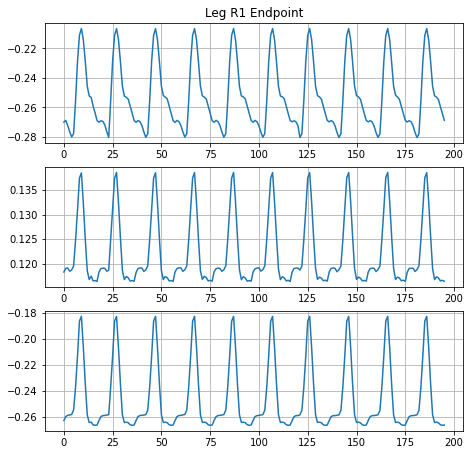

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7.5,7.5),
            facecolor='white')

plt.subplot(3, 1, 1)

plt.title("Leg R1 Endpoint")
plt.grid()
plt.plot(t, ef_pos_L2[0])
# plt.ylabel("$\phi_1$")

plt.subplot(3, 1, 2)
plt.grid()
plt.plot(t, ef_pos_L2[1])
# plt.ylabel("$\phi_2$")

plt.subplot(3, 1, 3)
plt.grid()
plt.plot(t, ef_pos_L2[2])
# plt.ylabel("$\phi_3$")


Text(0.5, 0, 'X')

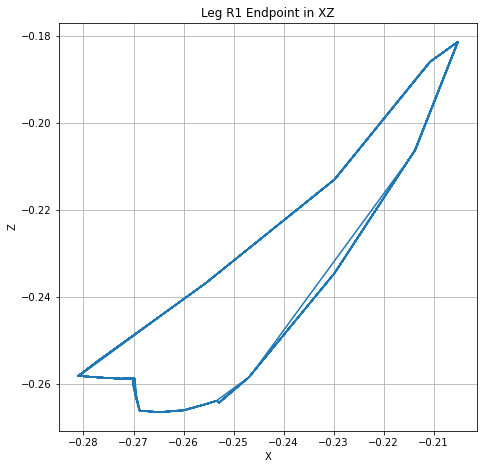

In [113]:
%matplotlib inline
fig = plt.figure(figsize=(7.5,7.5),
            facecolor='white')

plt.title("Leg R1 Endpoint in XZ")
plt.grid()
plt.plot(ef_pos_R2[0], ef_pos_R2[2])
plt.ylabel("Z")
plt.xlabel("X")


In [115]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(ef_pos_R1[0], ef_pos_R1[1], ef_pos_R1[2], label='RF')
ax.plot(ef_pos_R2[0], ef_pos_R2[1], ef_pos_R2[2], label='RH')
ax.plot(ef_pos_L1[0], ef_pos_L1[1], ef_pos_L1[2], label='LF')
ax.plot(ef_pos_L2[0], ef_pos_L2[1], ef_pos_L2[2], label='LH')

/tmp/ipykernel_26283/624336847.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
